In [1]:
import xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load trained model
xgbr = xgboost.XGBRegressor()
xgbr.load_model("data/xgboost_regressor_dissolution_rate.json")

# load dataset
diss = pd.read_csv("data/in_situ_data_for_regression.csv")

feature_names = ["Omega_use", "Size_num", "Deployment_d", 'Material_num',
          "Device_num", "inorg_treated", "Mesh", 'Method_num']

In [3]:
# define ranges or values that are possible for each feature
omega_range = np.linspace(0.38,1.20, 200)
size_range = diss.Size_num.unique()
depl_range = diss['Deployment_d'].unique()
mesh_range = diss.Mesh.unique()
device = [0,1]
inorg = [0,1,2]
mat = [0,1]
method = [0,1]

# make dataframe with all possible combinations
index = pd.MultiIndex.from_product([omega_range, size_range, depl_range, mat, device, inorg, mesh_range, method], 
                                   names = feature_names)
df = pd.DataFrame(index = index).reset_index()

In [4]:
# let model predict dissolution rates
df_pred = xgbr.predict(df)

## Figure 8

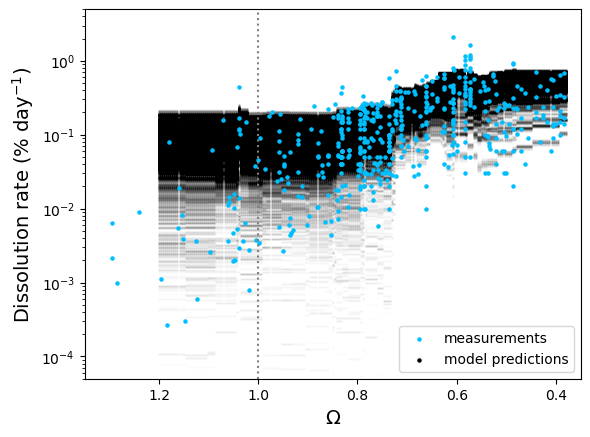

In [5]:
#plt.scatter(1-diss["Omega"], diss["Dissrate % d-1"], color='red', s)
plt.scatter(df["Omega_use"], df_pred, color='black', alpha=0.01, s=0.5)
plt.scatter(diss["Omega_use"], diss["Rate_mass"], color='deepskyblue', s=5, label='measurements')
# just there so the legend looks sensible
plt.scatter(5, 5, color='black', s=5, label='model predictions')
plt.yscale('log')
plt.xlabel("$\Omega$", fontsize=14)
plt.ylabel("Dissolution rate (% day$^{-1}$)", fontsize=14)
plt.axvline(1,color="gray", linestyle="dotted")
plt.gca().invert_xaxis()
plt.xlim(1.35,0.35)
plt.ylim(5e-5,5)
plt.legend(loc=4)
plt.show()